# Visualisation des données

In [153]:
%reset -f

In [154]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

from ast import literal_eval as l_eval
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.animation import FuncAnimation

In [155]:
%matplotlib nbagg

## Chargement des données 

In [156]:
""" Chargement de la dataframe (qui contient 1 seule ligne à priori) """

converters={'rho':l_eval, 'E_u':l_eval, 'F_u':l_eval, 'T_u':l_eval, 'E_d':l_eval, 'F_d':l_eval, 'T_d':l_eval, 'E_l':l_eval, 'F_l':l_eval, 'T_l':l_eval, 'E_r':l_eval, 'F_r':l_eval, 'T_r':l_eval}
df_simu = pd.read_csv("../../data/df_simu.csv", converters=converters)

x_min = df_simu.loc[0, "x_min"]
x_max = df_simu.loc[0, "x_max"]
y_min = df_simu.loc[0, "y_min"]
y_max = df_simu.loc[0, "y_max"]
t_0 = df_simu.loc[0, "t_0"]
t_f = df_simu.loc[0, "t_f"]

N = df_simu.loc[0, 'N']
M = df_simu.loc[0, 'M']
step_count = df_simu.loc[0, 'step_count']

print("x_min, x_max:", (x_min, x_max))
print("y_min, y_max:", (y_min, y_max))
print("t_0, t_f    :", (t_0, t_f))
print()
print("taille du maillage :", (N, M))
print("nombre d'itérations:", step_count)

df_simu

x_min, x_max: (0, 3)
y_min, y_max: (0, 0.05)
t_0, t_f    : (0, 0.0003344)

taille du maillage : (300, 5)
nombre d'itérations: 40


,x_min,x_max,y_min,y_max,N,M,c,a,C_v,CFL,...,T_u,E_d,F_d,T_d,E_l,F_l,T_l,E_r,F_r,T_r
0,0,3,0,0.05,300,5,299,0.01372,0.14361,0.25,...,"[[0.056234, 0.056234, 0.056234, 0.056234, 0.05...","[[1.37199e-07, 1.37199e-07, 1.37199e-07, 1.371...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0.056234, 0.056234, 0.056234, 0.056234, 0.05...","[[1.37199e-07, 1.37199e-07, 1.37199e-07, 1.371...","[[0, 0, 0, 0, 0], [0.00171498, 0.00171498, 0.0...","[[0.056234, 0.056234, 0.056234, 0.056234, 0.05...","[[1.37199e-07, 1.37199e-07, 1.37199e-07, 1.371...","[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0...","[[0.056234, 0.056234, 0.056234, 0.056234, 0.05..."


<IPython.core.display.Javascript object>


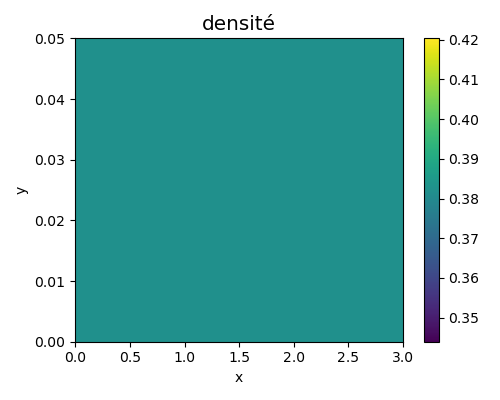

(min, max) rho = (0.38214, 0.38214)


In [157]:
""" Un plot de la densite """

# pour calculer les valeurs extremes d'un tenseur
def min_max(mat, dim=2):
    mat_min = mat
    for i in range(dim-1, -1, -1):
        mat_min = np.nanmin(mat_min, axis=i)
        
    mat_max = mat
    for i in range(dim-1, -1, -1):
        mat_max = np.nanmax(mat_max, axis=i)

    return mat_min, mat_max

# pour faire les plots
def plot_density(ax, df, index=0, cb=True):
    rho = np.array(df.loc[0, 'rho'])
    rho_min, rho_max = min_max(rho)
    print("(min, max) rho =", (rho_min, rho_max))

    img = ax.imshow(rho, 
                    origin='lower', 
                    cmap="viridis", 
                    interpolation='none', 
                    aspect='auto', 
                    vmin=rho_min, vmax=rho_max,
                    extent=[x_min, x_max, y_min, y_max])
    if cb == True:
        fig.colorbar(img, ax=ax)

    # set_ticks(ax)
    ax.set_title("densité", size="x-large", y=1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")


fig, ax = plt.subplots(1,1,figsize=(5,4))
plot_density(ax, df_simu, 0)
plt.tight_layout()

## Animation

In [158]:
""" Chargement des donnnees pour le plot des signaux en video """

e = np.empty(shape=(step_count, M, N), dtype=float)
f = np.empty(shape=(step_count, M, N), dtype=float)
t = np.empty(shape=(step_count, M, N), dtype=float)
tr = np.empty(shape=(step_count, M, N), dtype=float)

for i in range(step_count):
    file_name = "../../data/anim/animation." + str(i) + ".csv";
    df = pd.read_csv(file_name)
    e[i] = np.array(df['E']).reshape(M, N)
    f[i] = np.sqrt(np.array(df['F_x'])**2 + np.array(df['F_y'])**2).reshape(M, N)
    t[i] = np.array(df['T']).reshape(M, N)
    tr[i] = np.array(df['Tr']).reshape(M, N)

# le debut de la dataframe au temps final 
display(df[:5])

,E,F_x,F_y,T,Tr
0,0.006699,0.007021,0,0.832670,0.835909
1,0.006698,0.007018,0,0.831860,0.835896
2,0.006689,0.007008,0,0.832024,0.835620
3,0.006651,0.006970,0,0.831013,0.834413
4,0.006538,0.006856,0,0.825769,0.830858


(300,)


<IPython.core.display.Javascript object>


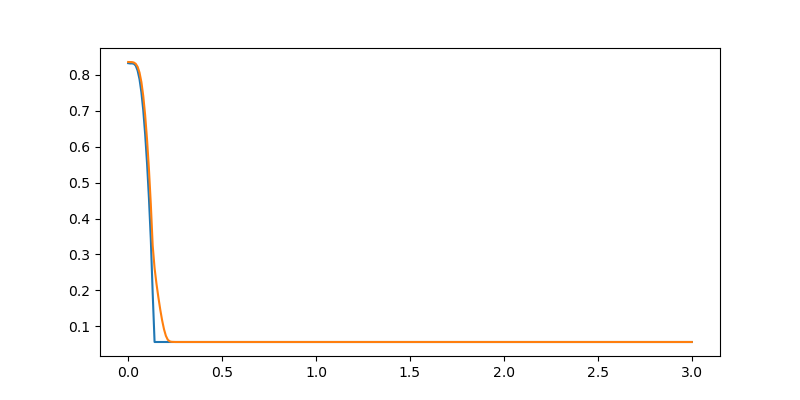

In [159]:
# """ Cas test de Olson-Auer-Hall """
# T = t[-1, M//2, :]
# TR = tr[-1, M//2, :]
# x = np.linspace(0, 3, 300)
# print(T.shape)

# # np.save("ct_10.npy", e)
# fig, ax = plt.subplots(1,1,figsize=(8,4))
# ax.plot(x, T)
# ax.plot(x, TR)

# # ax.loglog(x, 10**T)
# # ax.loglog(x, 10**TR)

# plt.show()

<IPython.core.display.Javascript object>


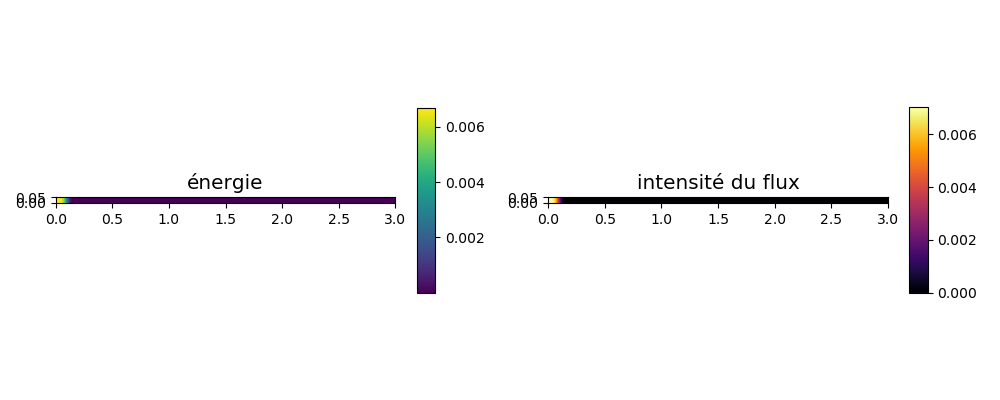

E: (min, max) = (1.37199e-07, 0.006698699999999999)
T: (min, max) = (0.056234000000000006, 0.83267)
F: (min, max) = (0.0, 0.00702461)


In [160]:
""" Animation de l'energie et de la norme du flux avec imshow """

fig, ax = plt.subplots(1,2,figsize=(10,4))

################### Mise en place de l'energie (ou de la temperature)
e_min, e_max = min_max(e, 3)
print("E: (min, max) =", (e_min, e_max))

t_min, t_max = min_max(t, 3)
print("T: (min, max) =", (t_min, t_max))


img1 = ax[0].imshow(e[0], origin='lower', cmap="viridis", interpolation='bilinear', extent=[x_min, x_max, y_min, y_max], vmin=e_min, vmax=e_max)
# img1 = ax[0].imshow(e[0], origin='lower', cmap="nipy_spectral", interpolation='bilinear', extent=[x_min, x_max, y_min, y_max], vmin=e_min, vmax=e_max)
# img1 = ax[0].imshow(t[0], origin='lower', cmap=cm.coolwarm, interpolation='bilinear', extent=[x_min, x_max, y_min, y_max], vmin=t_min, vmax=t_max)

fig.colorbar(img1, shrink=0.5, aspect=10, ax=ax[0])
ax[0].set_title("énergie", size="x-large")
# ax[0].set_title("température", size="x-large")

################### Mise en place du flux
f_min, f_max = min_max(f, 3)
print("F: (min, max) =", (f_min, f_max))

img2 = ax[1].imshow(f[0], origin='lower', cmap="inferno", interpolation='bilinear', extent=[x_min, x_max, y_min, y_max], vmin=f_min, vmax=f_max)
# img2 = ax[1].imshow(f[0], origin='lower', cmap="jet", interpolation='bilinear', extent=[x_min, x_max, y_min, y_max], vmin=f_min, vmax=f_max)

fig.colorbar(img2, shrink=0.5, aspect=10, ax=ax[1])
ax[1].set_title(r"intensité du flux", size="x-large")

################### Fonction d'animation
def animate(i):
    img1.set_array(e[i])    
#     img1.set_array(t[i])    

    img2.set_array(f[i])

    return [img1, img2]

anim = FuncAnimation(fig, animate, frames=step_count, repeat=False, interval=100)
plt.tight_layout()
plt.show()

In [161]:
# """ Animation de l'energie et de la norme du flux en lignes de niveau """

# fig, ax = plt.subplots(1,2,figsize=(10,4))

# ################## Necessaire pour le contourf
# x = np.linspace(x_min, x_max, N)
# y = np.linspace(y_min, y_max, M)
# XX, YY = np.meshgrid(x, y)
# levels = 10

# ################### Mise en place de l'energie
# e_min, e_max = min_max(e, 3)
# print("E: (min, max) =", (e_min, e_max))

# img1 = ax[0].contourf(XX, YY, e[0], levels=levels, cmap="nipy_spectral", vmin=e_min, vmax=e_max)

# fig.colorbar(img1, shrink=0.5, aspect=10, ax=ax[0])
# ax[0].set_title("énergie", size="x-large")

# ################### Mise en place du flux
# f_min, f_max = min_max(f, 3)
# print("F: (min, max) =", (f_min, f_max))

# img2 = ax[0].contourf(XX, YY, f[0], levels=levels, cmap="jet", vmin=f_min, vmax=f_max)

# fig.colorbar(img2, shrink=0.5, aspect=10, ax=ax[1])
# ax[1].set_title(r"intensité du flux", size="x-large")


# ################### Fonction d'animation
# def animate(i):
# #     img1 = ax[0].contourf(XX, YY, e[i], levels=levels, cmap="nipy_spectral", vmin=e_min, vmax=e_max)   
# #     img2 = ax[1].contourf(XX, YY, f[i], levels=levels, cmap="jet", vmin=f_min, vmax=f_max)

#     img1 = ax[0].contourf(XX, YY, e[i], levels=levels, cmap="nipy_spectral")   
#     img2 = ax[1].contourf(XX, YY, f[i], levels=levels, cmap="jet")
#     return [img1, img2]

# anim = FuncAnimation(fig, animate, frames=step_count, repeat=False, interval=10)
# plt.tight_layout()
# plt.show()

In [162]:
""" Sauvegarde de la video """

# n_seconds = 20
# fps = step_count / n_seconds
# anim.save('video 1.mp4', writer='ffmpeg', fps=fps)

' Sauvegarde de la video '

## Visualisation des signaux sur les bords

In [163]:
""" Evolution des signaux sur les bords (certains des plots sont tracés en 3D) """

# def plot_borders(ax, df, type="surface", cmap="viridis", stride=10):
#     # make the time axis, x , y
#     t = np.linspace(df["t_0"], df["t_f"], df["step_count"])

#     x = np.linspace(df["x_min"], df["x_max"], df["N"])
#     y = np.linspace(df["y_min"], df["y_max"], df["M"])
    
#     XX, TT = np.meshgrid(x, t)
#     YY, TT = np.meshgrid(y, t)

#     #  make the signals
#     E_u = np.array(df.loc[0, "E_u"])
#     E_d = np.array(df.loc[0, "E_d"])
#     E_l = np.array(df.loc[0, "E_l"])
#     E_r = np.array(df.loc[0, "E_r"])

#     if type=="surface":
#         ax[0, 1].plot_surface(TT, XX, E_u, cmap=cmap, edgecolor='none')
#         ax[2, 1].plot_surface(TT, XX, E_d, cmap=cmap, edgecolor='none')
#         ax[1, 0].plot_surface(TT, YY, E_l, cmap=cmap, edgecolor='none')
#         ax[1, 2].plot_surface(TT, YY, E_r, cmap=cmap, edgecolor='none')
#     elif type=="wireframe":
#         ax[0, 1].plot_wireframe(TT, XX, E_u, rstride=stride, cstride=stride)
#         ax[2, 1].plot_wireframe(TT, XX, E_d, rstride=stride, cstride=stride)
#         ax[1, 0].plot_wireframe(TT, YY, E_l, rstride=stride, cstride=stride)
#         ax[1, 2].plot_wireframe(TT, YY, E_r, rstride=stride, cstride=stride)

#     for i in range(3):
#         for j in range(3):
#             ax[i, j].set_xlabel('t')

#     ax[0, 1].set_ylabel('x')
#     ax[2, 1].set_ylabel('x')
#     ax[1, 0].set_ylabel('y')
#     ax[0, 2].set_ylabel('y')

#     ax[0, 1].set_title('en haut',size="medium", y=1.)
#     ax[2, 1].set_title('en bas',size="medium", y=1.)
#     ax[1, 0].set_title('à gauche',size="medium", y=1.)
#     ax[1, 2].set_title('à droite',size="medium", y=1.)

#     ax[0, 1].view_init(90, 0)
#     ax[2, 1].view_init(90, 0)
#     ax[1, 0].view_init(90, -90)
#     ax[1, 2].view_init(90, -90);

' Evolution des signaux sur les bords (certains des plots sont tracés en 3D) '

In [164]:
""" Evolution des signaux sur les bords (tous les plots sont tracés en 2D) """

def plot_borders_2(ax, df, index, cmap="viridis", signal="E"):
    #  les ondes sur chaque bord
    up = np.stack(df.loc[index, signal+"_u"])
    down = np.stack(df.loc[index, signal+"_d"])
    left = np.stack(df.loc[index, signal+"_l"])
    right = np.stack(df.loc[index, signal+"_r"])
    
    if N == M:
#         signal_min, signal_max = min_max(np.vstack([up, down, left, right]))
        signal_min, signal_max = None, None
    else:
        signal_min, signal_max = None, None

    ax[0, 1].imshow(up, aspect='auto', origin="lower", cmap=cmap, vmin=signal_min, vmax=signal_max, extent=[x_min, x_max, t_0, t_f])
    ax[2, 1].imshow(down, aspect='auto', origin="lower", cmap=cmap, vmin=signal_min, vmax=signal_max, extent=[x_min, x_max, t_0, t_f])
    ax[1, 0].imshow(left.T, aspect='auto', origin="lower", cmap=cmap, vmin=signal_min, vmax=signal_max, extent=[t_0, t_f, y_min, y_max])
    ax[1, 2].imshow(right.T, aspect='auto', origin="lower", cmap=cmap, vmin=signal_min, vmax=signal_max, extent=[t_0, t_f, y_min, y_max])

    ax[0, 1].set_xlabel('x')
    ax[2, 1].set_xlabel('x')
    ax[1, 0].set_xlabel('t')
    ax[1, 2].set_xlabel('t')

    ax[0, 1].set_ylabel('t')
    ax[2, 1].set_ylabel('t')
    ax[1, 0].set_ylabel('y')
    ax[1, 2].set_ylabel('y')
    
#     if signal == "E":    # petite triche
#         signal = "T"
    
    ax[0, 1].set_title(signal+' en haut',size="medium", y=0.99)
    ax[2, 1].set_title(signal+' en bas',size="medium", y=0.99)
    ax[1, 0].set_title(signal+' à gauche',size="medium", y=0.99)
    ax[1, 2].set_title(signal+' à droite',size="medium", y=0.99)

In [165]:
# %matplotlib inline

<IPython.core.display.Javascript object>


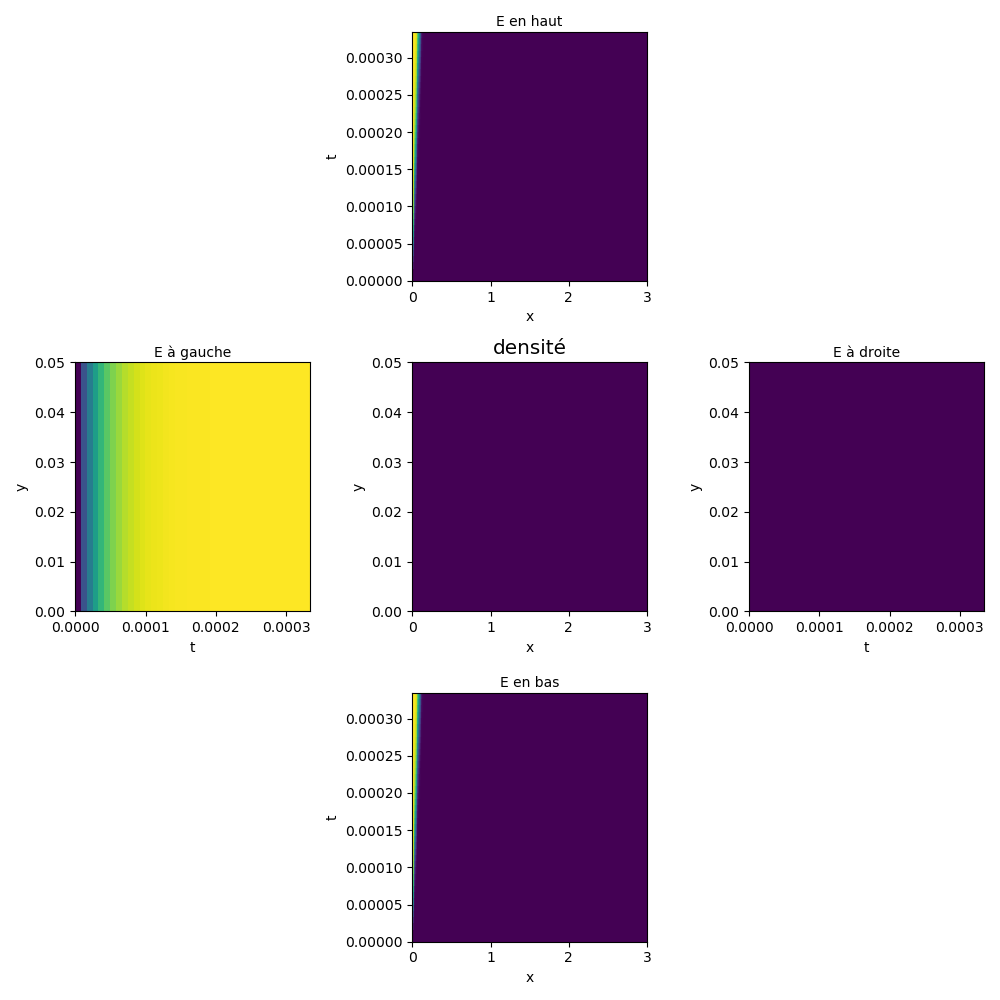

(min, max) rho = (0.38214, 0.38214)


In [166]:
""" Finalement, affichage de la densite et des signaux """

def plotAllBorders(df, signal):
    fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
    for i in range(3):
        for j in range(3):
            if i != 1 and j != 1:
                ax[i, j].remove()

    # plot_borders(ax, df_simu, type="surface", cmap="viridis")
    plot_borders_2(ax, df, 0, cmap="viridis", signal=signal)
    plot_density(ax[1, 1], df, 0, cb=False)

    # fig.colorbar(img, shrink=2, aspect=20, orientation="horizontal")
    plt.suptitle("Observation de l'évolution de "+signal+" sur les bords du domaine", size="xx-large", y=1.05)
    plt.tight_layout();
    
plotAllBorders(df_simu, signal="E")